In [7]:
from sklearn.datasets import make_moons

from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt

In [97]:
X, y = make_blobs(n_features=2, centers=3, random_state=42)

In [98]:
X.shape

(100, 2)

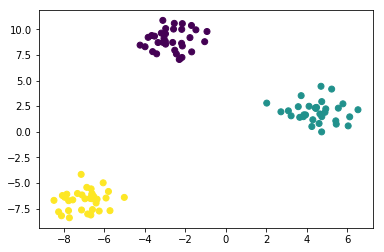

In [99]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [100]:
from sklearn.cluster import KMeans

In [101]:
model = KMeans(6, n_init=1, max_iter=1)

In [102]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
    n_clusters=6, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [103]:
# model.cluster_centers_

In [104]:
# model.labels_

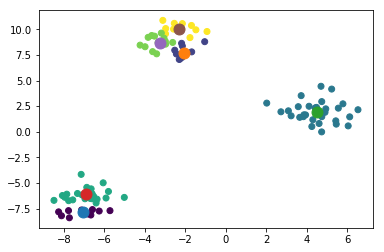

In [105]:
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)

for center in model.cluster_centers_:
    plt.scatter(center[0], center[1], s=120)

In [106]:
import numpy as np
import random

In [173]:
class KMeansCustom:
    
    def __init__(self, n_clusters=8, max_iters=10, n_inits=10):
        
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.n_inits = n_inits
        
    def fit(self, X):
        
        self._X = X
        
        list_init = []
        
        for _ in range(self.n_inits):

            clusters = []
            for i in range(self.n_clusters):
                clusters.append(Cluster(i, random.choice(X)))

            for i in range(self.max_iters):

                labels = []

                for point in X:
                    distances = []
                    for cluster in clusters:
                        dis = cluster.distance(point)
                        distances.append((dis, cluster))

                    # chosen 0 is for tuple and index 1 of tuple is cluste
                    chosen_index = np.array(distances)[:, 0].argmin()
                    chosen_cluster = distances[chosen_index][1]    
                    chosen_cluster.points.append(point)
                    labels.append(chosen_cluster.name)

                for cluster in clusters:
                        cluster.reset_center()
                
            err = 0
            for point, cluster_name in zip(X, labels):
                err += clusters[cluster_name].distance(point)
                
            list_init.append((err, clusters, labels))
                
                
        best_index = np.array(list_init)[:, 0].argmin()
        best_init = list_init[best_index]
        clusters = best_init[1]
        labels = best_init[2]

        self.cluster_centers = [cluster.center for cluster in clusters]
        self.labels = labels
        self.error = best_init[0]
        

class Cluster:
    
    def __init__(self, name, center):
        self.name = name
        self.center = center
        self.points = []
        
    def distance(self, point):        
        return np.sqrt(np.sum((self.center - point)**2))
    
    def reset_center(self):
        self.center = np.mean(self.points, axis=0)
        self.points = []

In [174]:
X, y = make_blobs(n_features=2, centers=5, random_state=42)


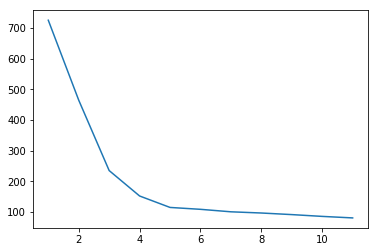

In [175]:
errors = []
for k in range(1, 12):
    model = KMeansCustom(k, n_inits=10)
    model.fit(X)
    errors.append(model.error)
    
plt.plot(np.arange(1, 12), errors)


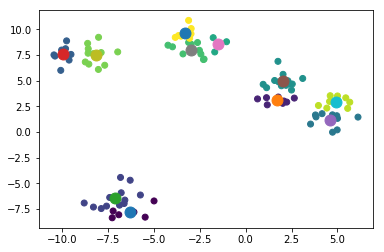

In [176]:
plt.scatter(X[:, 0], X[:, 1], c=model.labels)

for center in model.cluster_centers:
    plt.scatter(center[0], center[1], s=120)